We make an initial exploration of the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, f_oneway
from statsmodels.api import OLS, add_constant

In [3]:
df = pd.read_csv('../data/telecom_sales_data.csv')
df.head()

,Unnamed: 0,marketing_score,competition_index,customer_satisfaction,purchasing_power_index,weather_condition,tech_event,5g_phase,store_traffic,public_transport,city,jPhone_Pro_revenue,Kaggle_Pixel_5_revenue,Planet_SX_revenue
0,2019-01-01,100.00,50.00,85.0,120.00,Bad,NaN,Pre-5G,0.02,Hub,Paris,122182.54,68709.20,36032.11
1,2019-01-02,100.09,50.52,85.0,120.09,Good,NaN,Pre-5G,1.08,Good,Paris,146473.79,73935.56,44180.21
2,2019-01-03,100.18,51.04,85.0,120.17,Moderate,NaN,Pre-5G,-0.24,Limited,Paris,129647.90,75375.54,41112.52
3,2019-01-04,100.27,51.56,85.0,120.26,Moderate,NaN,Pre-5G,-0.13,Poor,Paris,137621.01,85213.00,46222.99
4,2019-01-05,100.36,52.08,85.0,120.34,Bad,NaN,Pre-5G,0.06,Limited,Paris,194936.87,89281.49,38312.08


We adjust the data

In [4]:
# rename first column to 'date'
df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# for ease of use
jphone = 'jPhone_Pro_revenue'
kaggle = 'Kaggle_Pixel_5_revenue'
planet = 'Planet_SX_revenue'

# remove nan errors
df['tech_event'] = df['tech_event'].fillna('')

In [5]:
df.isna().sum()/len(df)

date                      0.000000
marketing_score           0.014998
competition_index         0.024863
customer_satisfaction     0.009466
purchasing_power_index    0.019560
weather_condition         0.003935
tech_event                0.000000
5g_phase                  0.016594
store_traffic             0.008326
public_transport          0.005703
city                      0.000000
jPhone_Pro_revenue        0.064154
Kaggle_Pixel_5_revenue    0.048472
Planet_SX_revenue         0.065750
dtype: float64

We notice that there is a lot of missing data, but in each column, there is less than a 6,5% of missing data, hence, for now, we may ignore it.

# Exploration of Variables

We make exploration of different variables

## Time

In [6]:
df['date'].describe()

count                  17536
mean     2021-12-31 12:00:00
min      2019-01-01 00:00:00
25%      2020-07-01 18:00:00
50%      2021-12-31 12:00:00
75%      2023-07-02 06:00:00
max      2024-12-31 00:00:00
Name: date, dtype: object

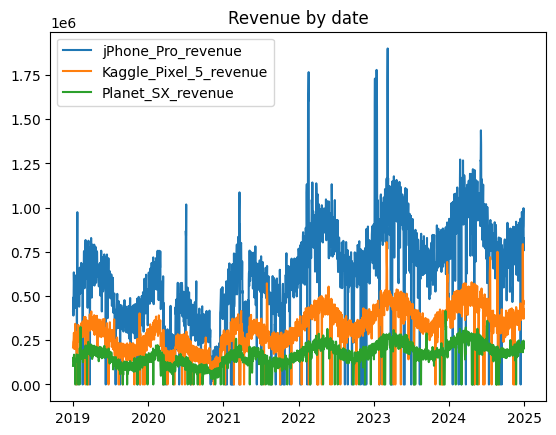

In [7]:
# time
df_by_date = df.groupby('date').sum()
dates = df_by_date.index

# plot
plt.plot(dates, df_by_date[jphone], label=jphone)
plt.plot(dates, df_by_date[kaggle], label=kaggle)
plt.plot(dates, df_by_date[planet], label=planet)
plt.legend()
plt.title('Revenue by date');

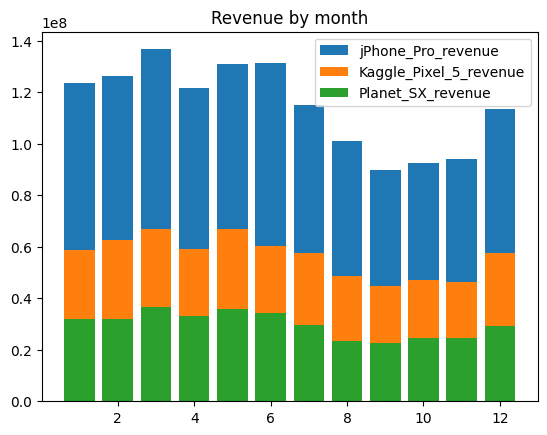

In [8]:
# by month
months = df_by_date.index.month
df_by_month = df_by_date.groupby(months).sum()

# plot
plt.bar(df_by_month.index, df_by_month[jphone], label=jphone)
plt.bar(df_by_month.index, df_by_month[kaggle], label=kaggle)
plt.bar(df_by_month.index, df_by_month[planet], label=planet)
plt.legend()
plt.title('Revenue by month');

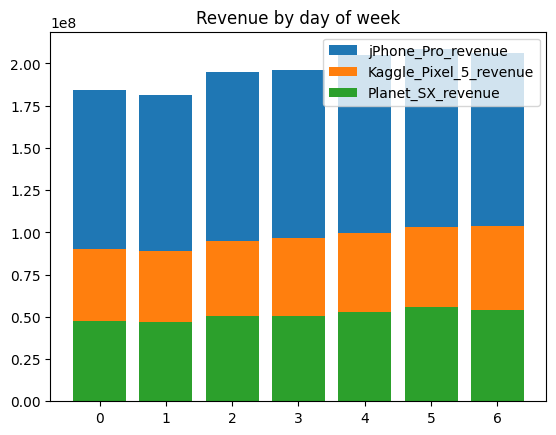

In [9]:
# by day of week
days = df_by_date.index.dayofweek
df_by_day = df_by_date.groupby(days).sum()

# plot
plt.bar(df_by_day.index, df_by_day[jphone], label=jphone)
plt.bar(df_by_day.index, df_by_day[kaggle], label=kaggle)
plt.bar(df_by_day.index, df_by_day[planet], label=planet)
plt.legend()
plt.title('Revenue by day of week');

from this, we conclude that the only likely predictor of the target variable is the month, as day day and the date does not seem to strongly predict the revenue.

## Marketing

In [10]:
df['marketing_score'].describe()

count    17273.000000
mean        88.737093
std         14.788447
min         40.900000
25%         81.010000
50%         89.820000
75%         98.290000
max        126.810000
Name: marketing_score, dtype: float64

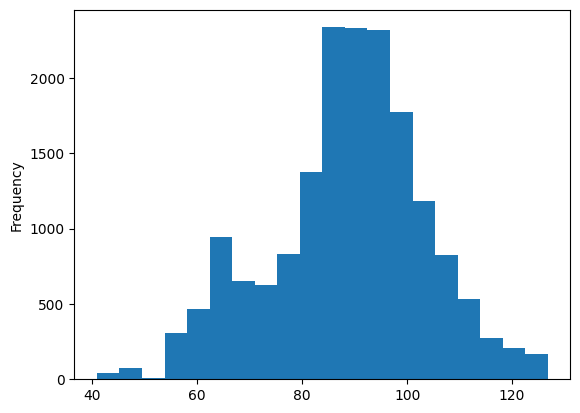

In [11]:
df['marketing_score'].plot(kind='hist', bins=20);

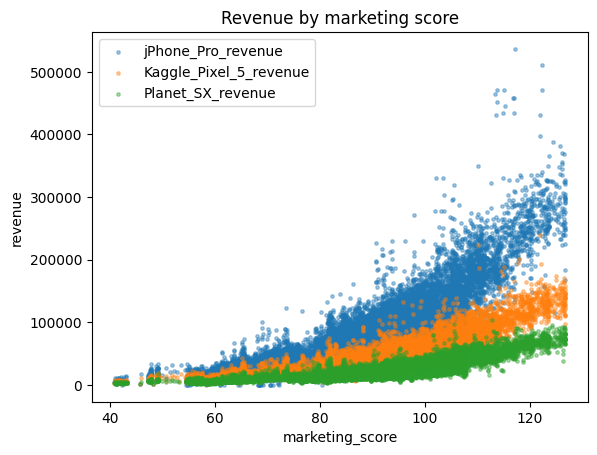

In [12]:
plt.scatter(df['marketing_score'],df[jphone], label=jphone,alpha=0.4, s=6)
plt.scatter(df['marketing_score'],df[kaggle], label=kaggle,alpha=0.4, s=6)
plt.scatter(df['marketing_score'],df[planet], label=planet,alpha=0.4, s=6)
plt.legend()
plt.xlabel('marketing_score')
plt.ylabel('revenue')
plt.title('Revenue by marketing score');

We notice inmediately that there is a correlation with revenue and marketing, so this is a variable of interest.

## Competition Index

In [13]:
df['competition_index'].describe()

count    17100.000000
mean        20.461446
std         13.678085
min          4.740000
25%         11.440000
50%         16.870000
75%         24.960000
max         64.410000
Name: competition_index, dtype: float64

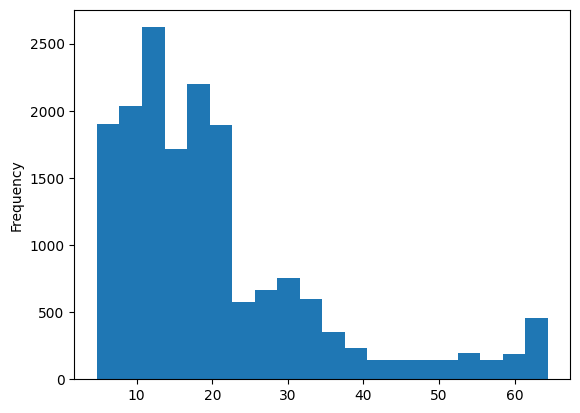

In [14]:
df['competition_index'].plot(kind='hist', bins=20);

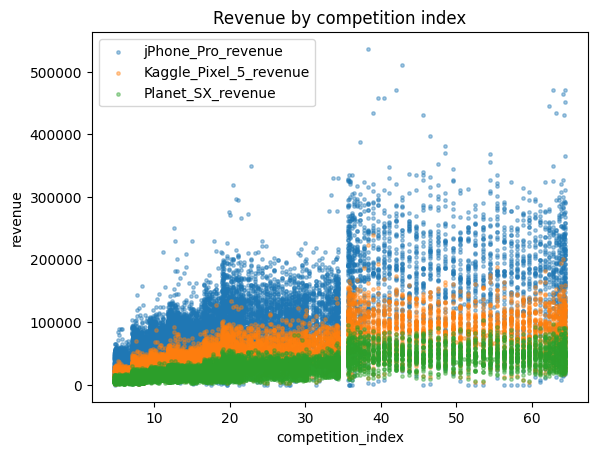

In [15]:
plt.scatter(df['competition_index'],df[jphone], label=jphone,alpha=0.4, s=6)
plt.scatter(df['competition_index'],df[kaggle], label=kaggle,alpha=0.4, s=6)
plt.scatter(df['competition_index'],df[planet], label=planet,alpha=0.4, s=6)
plt.legend()
plt.xlabel('competition_index')
plt.ylabel('revenue')
plt.title('Revenue by competition index');

We notice that there seems to be a correlation and, also, that ther may be a cut-off point in this variable. Also, the dispersion grows

##  Costumer Satisfaction

In [16]:
df['customer_satisfaction'].describe()  

count    17370.000000
mean        72.279904
std          9.160444
min         48.960000
25%         69.500000
50%         72.430000
75%         76.740000
max         89.770000
Name: customer_satisfaction, dtype: float64

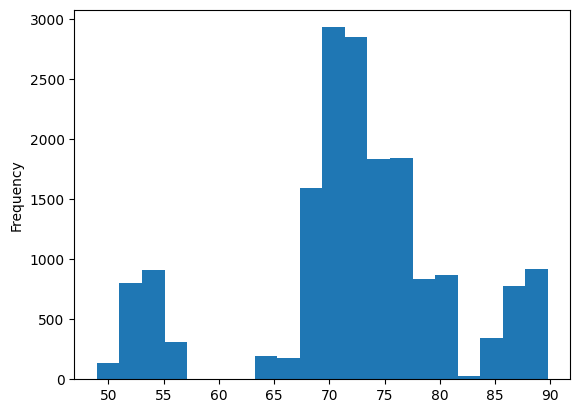

In [17]:
df['customer_satisfaction'].plot(kind='hist', bins=20);

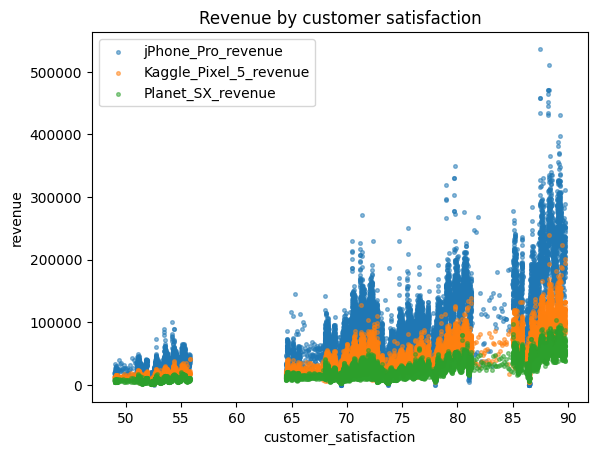

In [18]:
plt.scatter(df['customer_satisfaction'],df[jphone], label=jphone, alpha=0.5, s=7)
plt.scatter(df['customer_satisfaction'],df[kaggle], label=kaggle, alpha=0.5, s=7)
plt.scatter(df['customer_satisfaction'],df[planet], label=planet, alpha=0.5, s=7)
plt.legend()
plt.xlabel('customer_satisfaction')
plt.ylabel('revenue')
plt.title('Revenue by customer satisfaction');

Once again, there seems to be a correlation with revenue, but this variable may be problematic given the clear inbalance of the predictor, also once again the dispersiont grows.

## Purchasing Power Index

In [19]:
df['purchasing_power_index'].describe()

count    17193.000000
mean        98.769151
std         11.918490
min         75.000000
25%         91.130000
50%         97.490000
75%        105.000000
max        125.000000
Name: purchasing_power_index, dtype: float64

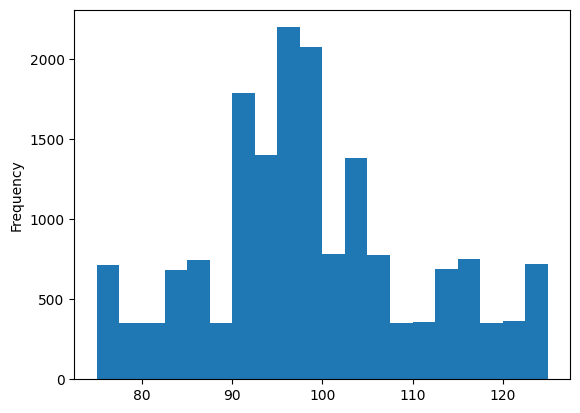

In [20]:
df['purchasing_power_index'].plot(kind='hist', bins=20);

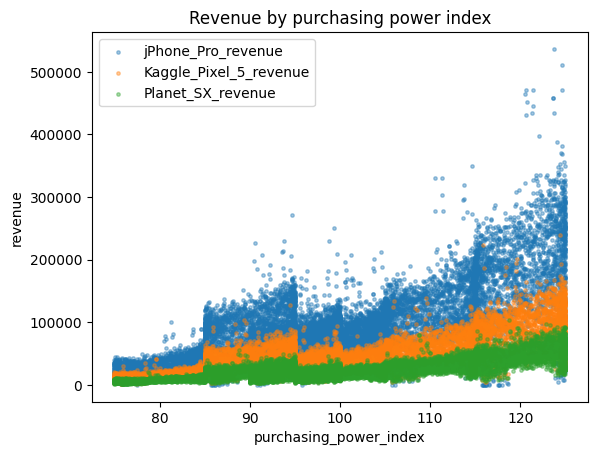

In [21]:
plt.scatter(df['purchasing_power_index'],df[jphone], label=jphone, alpha=0.4, s=6)
plt.scatter(df['purchasing_power_index'],df[kaggle], label=kaggle, alpha=0.4, s=6)
plt.scatter(df['purchasing_power_index'],df[planet], label=planet, alpha=0.4, s=6)
plt.legend()
plt.xlabel('purchasing_power_index')
plt.ylabel('revenue')
plt.title('Revenue by purchasing power index');

once again, there is a correlation with revenue, but the dispersion grows.

## Weather Conditions

In [22]:
df['weather_condition'].value_counts()  

weather_condition
Moderate    7599
Good        6020
Bad         3848
Name: count, dtype: int64

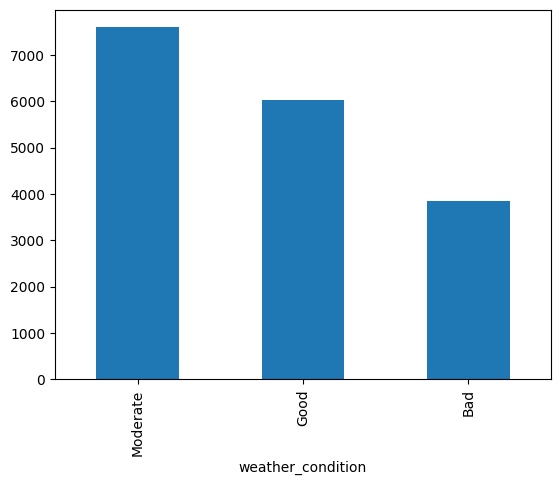

In [23]:
df['weather_condition'].value_counts().plot(kind='bar');

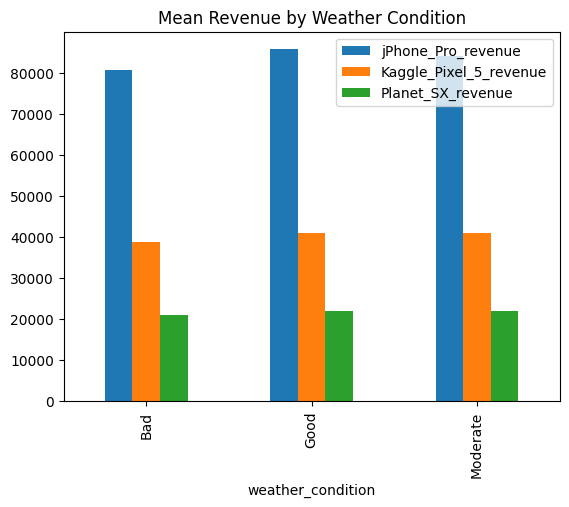

In [24]:
data_by_weather = df[[jphone,kaggle, planet, 'weather_condition']].groupby('weather_condition').mean()

data_by_weather.plot(kind='bar',title='Mean Revenue by Weather Condition');

we notice that the weather condition is in fact relevant to revenue.

## Tech event

In [25]:
df['tech_event'].value_counts()

tech_event
                17470
Major Launch       48
Tech Show          18
Name: count, dtype: int64

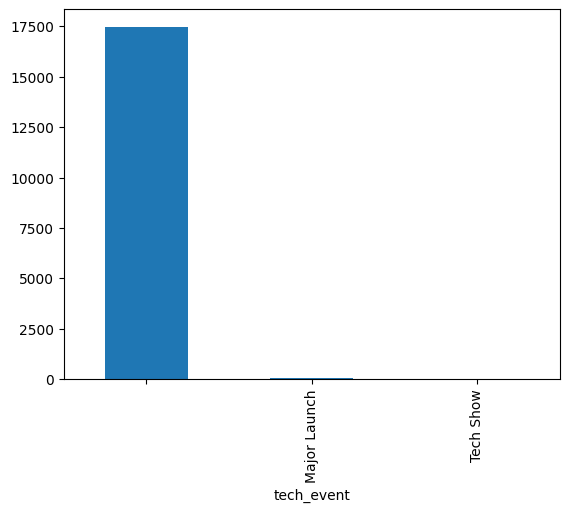

In [26]:
df['tech_event'].value_counts().plot(kind='bar');

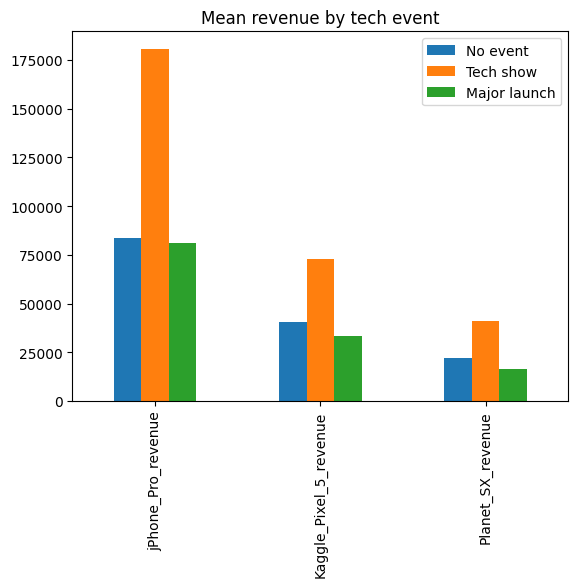

In [27]:
mean_no_event = df[df['tech_event']==''][[jphone,kaggle,planet]].mean()
mean_tech_show = df[df['tech_event']=='Tech Show'][[jphone,kaggle,planet]].mean()
mean_major_lauch = df[df['tech_event']=='Major Launch'][[jphone,kaggle,planet]].mean()

means = pd.concat([mean_no_event,mean_tech_show,mean_major_lauch],axis=1)
means.columns = ['No event','Tech show','Major launch']

means.plot(kind='bar')
plt.title('Mean revenue by tech event');

We make an unstacked bar plot to see the relationship between tech events and revenue, where we see that the average revenue is higher when there is a tech event and the revenue is similar when there is a major launch, althought slightly lower. Hence, it is likely that this variable is relevant.

## 5G Phase

In [28]:
df['5g_phase'].value_counts()

5g_phase
Mature-5G    7583
Pre-5G       3917
Early-5G     2873
Mid-5G       2872
Name: count, dtype: int64

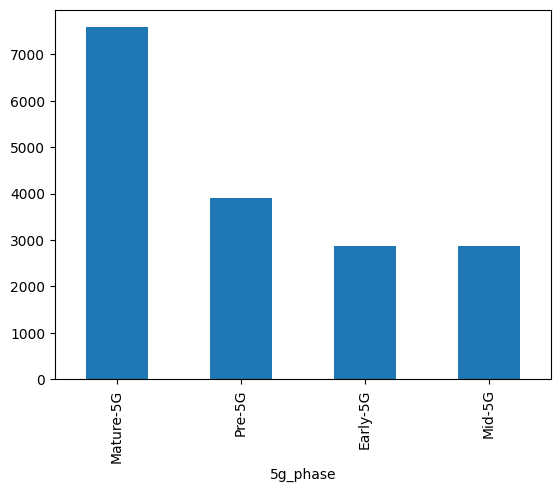

In [29]:
df['5g_phase'].value_counts().plot(kind='bar');

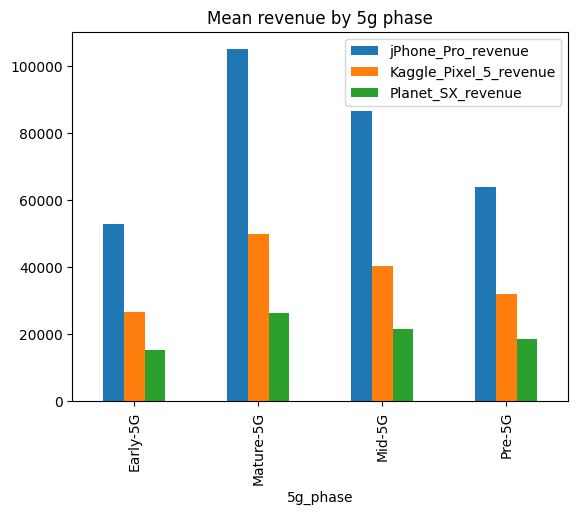

In [30]:
df_by_5g = df[['5g_phase',jphone,kaggle,planet]].groupby('5g_phase').mean()

df_by_5g.plot(kind='bar', title='Mean revenue by 5g phase');

Once again, a variable that seems relevent to the analysis.

## Store Traffic

In [31]:
df['store_traffic'].describe()

count    17390.000000
mean         0.195773
std          0.549067
min         -1.870000
25%         -0.170000
50%          0.190000
75%          0.570000
max          2.660000
Name: store_traffic, dtype: float64

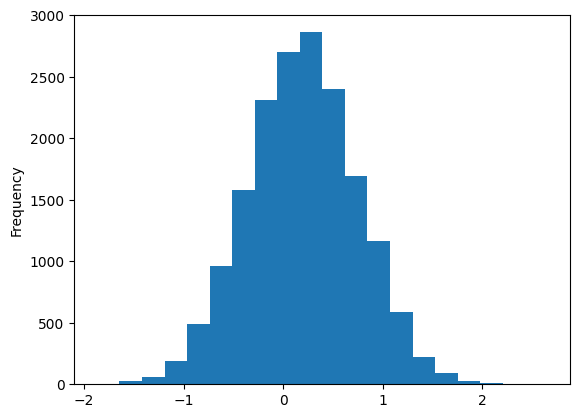

In [32]:
df['store_traffic'].plot(kind='hist', bins=20);

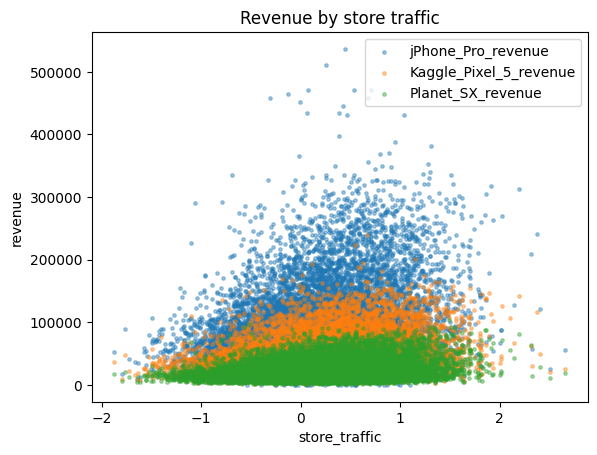

In [33]:
plt.scatter(df['store_traffic'],df[jphone], label=jphone, alpha=0.4, s=6)
plt.scatter(df['store_traffic'],df[kaggle], label=kaggle, alpha=0.4, s=6)
plt.scatter(df['store_traffic'],df[planet], label=planet, alpha=0.4, s=6)
plt.legend()
plt.xlabel('store_traffic')
plt.ylabel('revenue')
plt.title('Revenue by store traffic');

There is an aparent but weak relationship between this variable and revenue.

## Public Transport

In [34]:
df['public_transport'].value_counts()

public_transport
Hub        8617
Good       3123
Poor       2980
Limited    2716
Name: count, dtype: int64

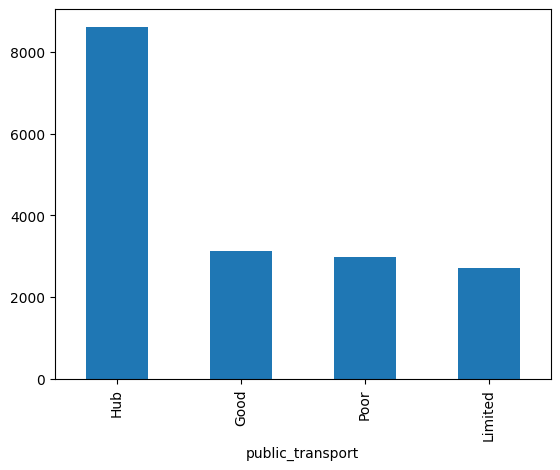

In [35]:
df['public_transport'].value_counts().plot(kind='bar');

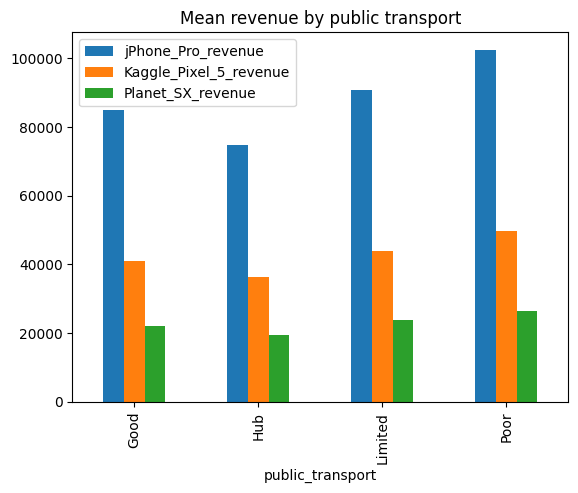

In [36]:
df_by_public_transport = df[['public_transport',jphone,kaggle,planet]].groupby('public_transport').mean()

df_by_public_transport.plot(kind='bar', title='Mean revenue by public transport');

Once again, there seems to be an existing relationship between this variable and revenue.

## City

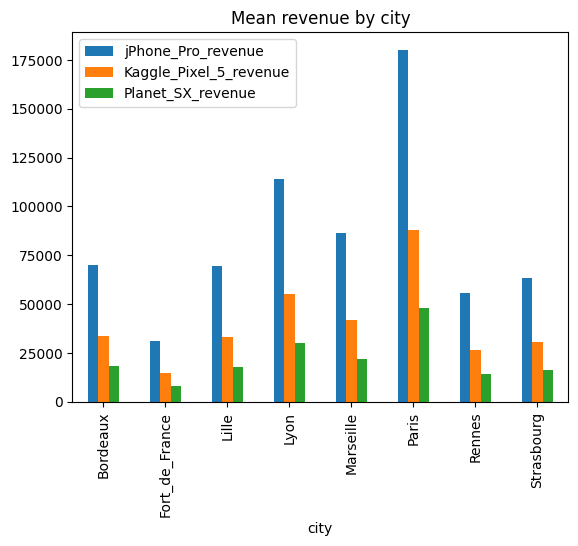

In [37]:
df_by_city = df[['city',jphone,kaggle,planet]].groupby('city').mean()

df_by_city.plot(kind='bar', title='Mean revenue by city');

There is, evidently, an strong relationship between city and revenue.

# Further Analysis

For continous variables, we will see the correlation matrix

In [38]:
df.dtypes

date                      datetime64[ns]
marketing_score                  float64
competition_index                float64
customer_satisfaction            float64
purchasing_power_index           float64
weather_condition                 object
tech_event                        object
5g_phase                          object
store_traffic                    float64
public_transport                  object
city                              object
jPhone_Pro_revenue               float64
Kaggle_Pixel_5_revenue           float64
Planet_SX_revenue                float64
dtype: object

<Axes: >

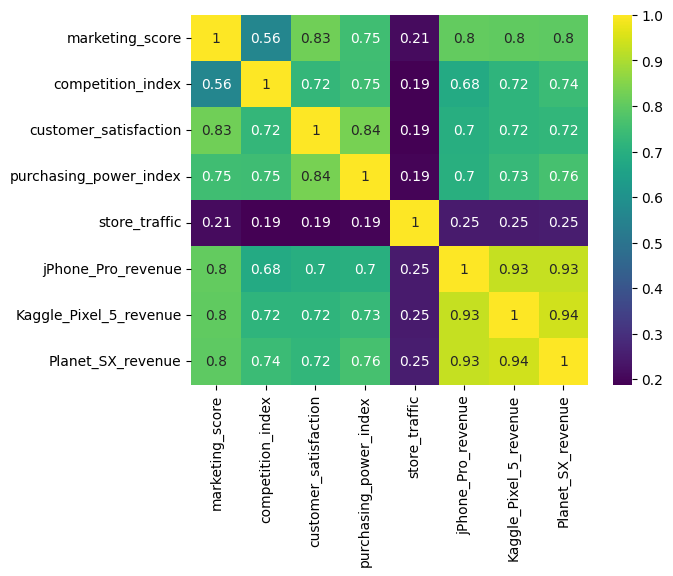

In [39]:
correlations = df[['marketing_score','competition_index','customer_satisfaction','purchasing_power_index','store_traffic',jphone,kaggle,planet]].corr()

sns.heatmap(correlations, annot=True, cmap='viridis')

In effect, the variables in which we noticed a correlation with revenue are strongly related to it, most of them with a correlation of 0.68 or higher. Perhaps unsurprisingy, the revenues of the different models are correlated with each other. This relation, however, should not be taken into account as each model will be predicted independently.

We may also remark, from the statistics, that the variables are more or less imbalanced, but nothing out of the ordinary, except for tech event, which is really imbalanced (logically) and the store traffic, that presents a clear distribution.

For the continous variables, we will study the realtion with linear regressions, and for the categorical variables, we will use ANOVA tests.

## Linear Regressions

In [40]:
cont_cols = ['marketing_score','competition_index','customer_satisfaction','purchasing_power_index','store_traffic',jphone,kaggle,planet]

R_cont = []
for col in cont_cols:
    for phone in [jphone,kaggle,planet]:
        x, y = df[col],df[phone]
        na_mask = ~np.isnan(x) & ~np.isnan(y)
        pval = linregress(x[na_mask],y[na_mask]).pvalue
        R_cont.append([col,phone,pval])

# p value table
R_cont = pd.DataFrame(R_cont, columns=['feature','phone','p_value'])
R_cont

,feature,phone,p_value
0,marketing_score,jPhone_Pro_revenue,0.000000e+00
1,marketing_score,Kaggle_Pixel_5_revenue,0.000000e+00
2,marketing_score,Planet_SX_revenue,0.000000e+00
3,competition_index,jPhone_Pro_revenue,0.000000e+00
4,competition_index,Kaggle_Pixel_5_revenue,0.000000e+00
5,competition_index,Planet_SX_revenue,0.000000e+00
6,customer_satisfaction,jPhone_Pro_revenue,0.000000e+00
7,customer_satisfaction,Kaggle_Pixel_5_revenue,0.000000e+00
8,customer_satisfaction,Planet_SX_revenue,0.000000e+00
9,purchasing_power_index,jPhone_Pro_revenue,0.000000e+00


We confirm, now statistically, that the variables that were observed to have a correlation with revenue are indeed correlated, even store traffic. This variables should be strong preditors.

## Cathegorical Variables

In [41]:
cath_var = ['weather_condition','tech_event','5g_phase','public_transport','city']

In [59]:
R_cath = []
for phone in [jphone,kaggle,planet]:
    for col in cath_var:
        data_var = []
        cathegories = df_paris[col].dropna().unique()
        for cat in cathegories:
            x = df[df[col]==cat][phone].dropna()
            data_var.append(x)
        f, p = f_oneway(*data_var)
        R_cath.append([phone,col,f,p])

R_cath = pd.DataFrame(R_cath,columns=['phone','feature','f','p'])  
R_cath 

,phone,feature,f,p
0,jPhone_Pro_revenue,weather_condition,8.302978,2.488241e-04
1,jPhone_Pro_revenue,tech_event,26.201264,4.355800e-12
2,jPhone_Pro_revenue,5g_phase,871.334521,0.000000e+00
3,jPhone_Pro_revenue,public_transport,189.823217,5.294360e-121
4,jPhone_Pro_revenue,city,3057.075046,0.000000e+00
5,Kaggle_Pixel_5_revenue,weather_condition,9.384406,8.447036e-05
6,Kaggle_Pixel_5_revenue,tech_event,15.067096,2.899653e-07
7,Kaggle_Pixel_5_revenue,5g_phase,764.453985,0.000000e+00
8,Kaggle_Pixel_5_revenue,public_transport,200.290855,1.300979e-127
9,Kaggle_Pixel_5_revenue,city,3878.184229,0.000000e+00


With this ANOVA analysis we confirm, with very high statistical significance, that the variables that were observed to have a correlation with revenue are indeed correlated. 

# Study of local variables

For this analysis, we will focus in the aggregated data, meaning not by phone, but by city, as we are interested in the local variables.

In [163]:
for var in cath_var:
    print(df[var].unique())

['Bad' 'Good' 'Moderate' nan]
['' 'Tech Show' 'Major Launch']
['Pre-5G' nan 'Early-5G' 'Mid-5G' 'Mature-5G']
['Hub' 'Good' 'Limited' 'Poor' nan]
['Paris' 'Lyon' 'Marseille' 'Lille' 'Bordeaux' 'Strasbourg' 'Rennes'
 'Fort_de_France']


We notice that these variables have a kind of hierarchy, hence, we may assign increasing values so that we may use linear regression to study the effects.

In [166]:

dict_cath = {'Bad': 0, 'Good': 1, 'Moderate': 2,
             '': 0, 'Tech Show': 1, 'Major Launch': 2,
             'Pre-5G': 0, 'Early-5G': 1, 'Mid-5G': 2, 'Mature-5G': 3,
             'Poor': 0, 'Limited': 1, 'Good': 2, 'Hub': 3}

df = df.replace(dict_cath)

In [177]:
df['city'].unique()

array(['Paris', 'Lyon', 'Marseille', 'Lille', 'Bordeaux', 'Strasbourg',
       'Rennes', 'Fort_de_France'], dtype=object)

## Paris

Now, we may do the linear regression study for all the variables.

We notice that these variables have a kind of hierarchy, hence, we may assign increasing values so that we may use linear regression to study the effects.

In [167]:
def city_study(city):
    df_city = df[df['city']==city].drop('city',axis=1)
    data_regr = df_city.drop('date',axis=1).dropna()
    X = data_regr.drop([jphone,kaggle,planet],axis=1)
    X
    pvalues, coeffs = [], []
    for phones in [jphone,kaggle,planet]:
        y = data_regr[phones]
        X = add_constant(X)
        model = OLS(y,X).fit()
        pvalues.append(model.pvalues)
        coeffs.append(model.params)
    coeffs = pd.DataFrame(coeffs, index=[jphone,kaggle,planet], columns=X.columns).T.max(axis=1)
    pvalues = pd.DataFrame(pvalues, index=[jphone,kaggle,planet], columns=X.columns).T.max(axis=1)

    return pd.concat([coeffs,pvalues],axis=1,keys=['coeffs','pvalues']).drop('const').sort_values('pvalues')

city_study('Paris')

,coeffs,pvalues
marketing_score,3442.389866,3.283681e-83
purchasing_power_index,3191.723673,1.348907e-17
customer_satisfaction,6551.581688,4.003269e-11
5g_phase,12010.731801,6.894282e-10
weather_condition,4935.638178,5.138940e-05
public_transport,-507.469078,3.535596e-03
store_traffic,2825.544709,1.868250e-01
competition_index,-21.941815,2.950163e-01
tech_event,24194.520675,5.912788e-01


From this information, we may formulate the following recommnedations, in order of importance:
- Increase marketing
- Search or invest in areas with higher purchasing power
- Increase customer satisfaction
- Search or invest in areas with higher 5g development
- Search or invest in areas with better weather conditions
- Avoid areas with a lot of public transport

The other variables are not statistically significant, hence could be assigned a lower priority. For a quantitative sorting of priorities, we may use the p values.

## Lyon

In [171]:
city_study('Lyon')

,coeffs,pvalues
marketing_score,2126.254730,3.658020e-74
purchasing_power_index,2050.601058,1.151616e-19
customer_satisfaction,4568.274060,8.143372e-14
5g_phase,7825.947655,1.400652e-09
weather_condition,3936.022546,7.801454e-09
store_traffic,2700.386790,2.551215e-01
tech_event,13729.528628,3.753990e-01
public_transport,-61.099215,5.810217e-01
competition_index,-4.085511,8.682022e-01


For Lyon, we find the following results:
- Increase marketing 
- Invest in areas with higher purchasing power	
- Increase customer_satisfaction	
- Invest in areas with more developed 5G	
- Invest in areas with better weather conditions
	
The other variables are not statistically significant, hence could be assigned a lower priority. For a quantitative sorting of priorities, we may use the p values.

## Marseille

In [174]:
city_study('Marseille')

,coeffs,pvalues
marketing_score,1909.106343,1.160484e-71
purchasing_power_index,1823.694121,1.080138e-25
customer_satisfaction,4080.765785,1.783411e-20
5g_phase,7050.415466,2.722837e-12
store_traffic,1967.712114,1.563454e-02
weather_condition,1598.315252,1.429182e-01
tech_event,6069.201867,8.003446e-01
competition_index,6.496917,8.756711e-01
public_transport,10.835326,9.018851e-01


For Marseille, we find the following results:

- Increase marketing
- Invest in areas with higher purchasing power
- Increase customer_satisfaction
- Invest in areas with more developed 5G
- Invest in areas with higher store traffic

The other variables are not statistically significant, hence could be assigned a lower priority. For a quantitative sorting of priorities, we may use the p values.

## Lille

In [175]:
city_study('Lille')

,coeffs,pvalues
marketing_score,1308.330948,9.835377e-55
purchasing_power_index,1742.789436,1.005141e-32
customer_satisfaction,3483.791372,2.885565e-16
weather_condition,2310.661644,3.857575e-10
5g_phase,5069.982169,6.547810e-10
store_traffic,837.616958,2.113656e-01
tech_event,2968.298719,6.125121e-01
competition_index,14.584566,7.814894e-01
public_transport,357.510253,8.510277e-01


For Lille, we find the following results:

- Increase marketing
- Invest in areas with higher purchasing power
- Increase customer_satisfaction
- Invest in areas with better weather conditions
- Invest in areas with more 5G development

The other variables are not statistically significant, hence could be assigned a lower priority. For a quantitative sorting of priorities, we may use the p values.

## Bordeaux

In [176]:
city_study('Bordeaux')

,coeffs,pvalues
marketing_score,1415.795950,3.792782e-59
purchasing_power_index,1821.488571,5.179089e-38
customer_satisfaction,3044.393819,1.144918e-13
5g_phase,5119.346880,3.196548e-08
weather_condition,1229.249220,6.509937e-03
store_traffic,1658.407061,3.118325e-02
public_transport,-85.774742,5.473816e-01
tech_event,-755.128493,7.310576e-01
competition_index,77.903432,8.789529e-01


For Bordeaux, we find the following results:

- Increase marketing
- Invest in areas with higher purchasing power
- Increase customer satisfaction
- Invest in areas with better 5G development
- Invest in areas with better weather conditions
- Invest in areas with higher store traffic

The other variables are not statistically significant, hence could be assigned a lower priority. For a quantitative sorting of priorities, we may use the p values.

## Strasbourg

In [178]:
city_study('Strasbourg')

,coeffs,pvalues
marketing_score,1171.623385,2.745533e-64
purchasing_power_index,1364.020949,1.988208e-29
weather_condition,2699.130620,4.898938e-14
customer_satisfaction,2657.512609,1.397459e-12
5g_phase,4464.196397,8.234879e-08
competition_index,65.590139,7.790042e-01
tech_event,4105.712508,9.037570e-01
public_transport,95.831013,9.538125e-01
store_traffic,379.216702,9.745636e-01


For Strasbourg, we find the following results:

- Increase marketing
- Invest in areas with higher purchasing power
- Invest in areas with better weather conditions
- Increase customer satisfaction
- Invest in areas with more developed 5G

The other variables are not statistically significant, hence could be assigned a lower priority. For a quantitative sorting of priorities, we may use the p values.

## Rennes

In [179]:
city_study('Rennes')

,coeffs,pvalues
marketing_score,900.147009,7.852141e-51
purchasing_power_index,1307.466227,7.323172e-38
customer_satisfaction,2190.894006,2.890575e-11
5g_phase,4425.639527,1.178155e-07
weather_condition,1594.402575,4.131633e-07
competition_index,120.444907,4.707636e-01
store_traffic,270.955234,5.692335e-01
public_transport,-24.652061,6.903256e-01
tech_event,7082.726093,8.340452e-01


For Rennes, we find the following results:

- Increase marketing
- Invest in areas with higher purchasing power
- Increase customer satisfaction
- Invest in areas with more developed 5G
- Invest in areas with better weather conditions

The other variables are not statistically significant, hence could be assigned a lower priority. For a quantitative sorting of priorities, we may use the p values.

## Fort de France

In [181]:
city_study('Fort_de_France')

,coeffs,pvalues
purchasing_power_index,1542.491583,3.409854e-101
marketing_score,753.168592,1.154761e-50
customer_satisfaction,2255.161580,1.738573e-23
weather_condition,1336.414066,3.133945e-06
5g_phase,1279.513997,4.402143e-01
competition_index,18.077080,5.288692e-01
store_traffic,-31.609023,6.622493e-01
public_transport,-20.298489,7.771807e-01
tech_event,2952.608076,8.185720e-01


For Fort de France, we find the following results:

- Invest in areas with higher purchasing power
- Increase marketing
- Increase customer satisfaction
- Invest in areas with better weather conditions

The other variables are not statistically significant, hence could be assigned a lower priority. For a quantitative sorting of priorities, we may use the p values.

## 